In [1]:
import yaml
import re
from EVRP import EVRP
from matplotlib import pyplot as plt

In [2]:
with open ('history_benchmark-setE-n22-k4.yml','r') as f:
    #return as dictionary, key=0,1,2.. values=(avg,best_ind)
    history=yaml.safe_load(f)

In [3]:
len(history)

1000

In [4]:
history[1]

{'Avg': '1181.2199731768674',
 'Best Individual': '(569.3343939957324, [[10, 8, 6, 3, 2, 7], [13, 11, 9, 12, 5, 4], [19, 16, 15, 17, 14], [18, 21, 20, 22]], [[1, 10, 8, 6, 3, 2, 30, 26, 7, 1], [1, 13, 11, 9, 12, 24, 29, 30, 25, 26, 5, 4, 1], [1, 19, 16, 15, 17, 24, 14, 1], [1, 18, 21, 20, 23, 22, 1]])'}

In [5]:
ind=history[1]['Best Individual'].split(',')[0]
ind

'(569.3343939957324'

In [6]:
float(re.findall(r'\w.*',ind)[0])

569.3343939957324

In [7]:
for i in history.keys():
    best_ind=history[i]['Best Individual'].split(',')[0]
    best_ind=float(re.findall(r'\w.*',best_ind)[0])
#     print(best_ind)

In [8]:
ind=history[1]['Best Individual'].split(',')

In [9]:
avg=[float(history[avg]['Avg']) for avg in history.keys()]

In [10]:
best_ind=[float(re.findall(r'\w.*',history[i]['Best Individual'].split(',')[0])[0]) for i in history.keys()]

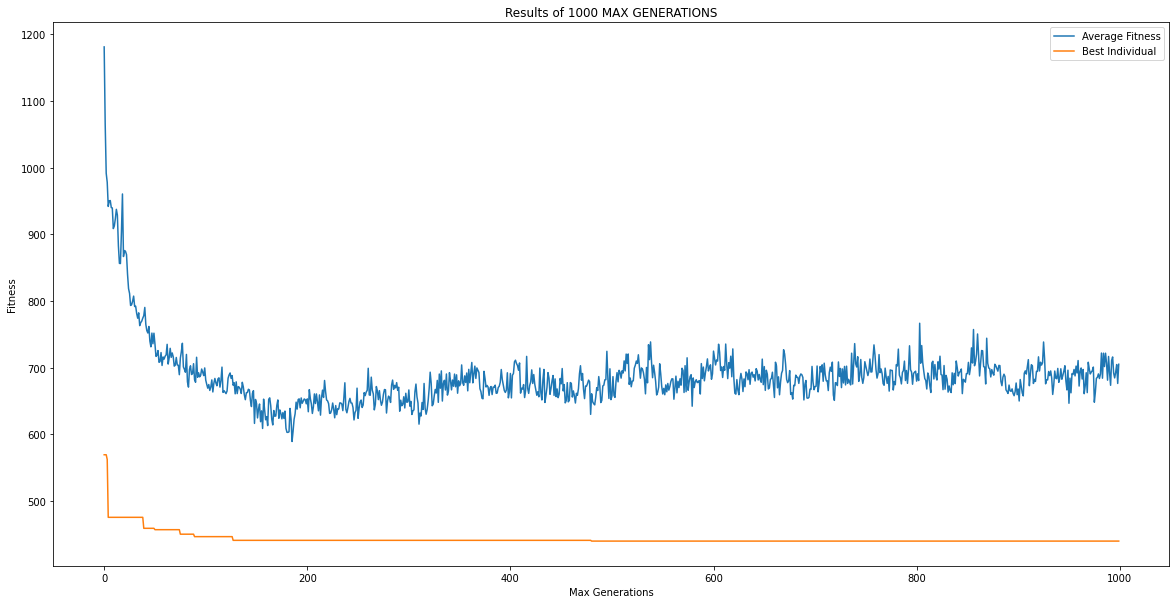

In [11]:
plt.figure(figsize=(20,10))
plt.title(f'Results of {len(history)} MAX GENERATIONS')
plt.xlabel('Max Generations')
plt.ylabel('Fitness')
plt.plot(avg,label='Average Fitness')
plt.plot(best_ind,label='Best Individual')
plt.legend()
plt.show()

In [12]:
#Last record of the best individual
last=history[len(history)]['Best Individual']
last

'(439.8037976219552, [[13, 16, 18], [14, 17, 15], [20, 22, 21, 19], [7, 2, 3, 6, 8, 10], [11, 4, 5, 9, 12]], [[1, 13, 16, 18, 1], [1, 14, 17, 15, 1], [1, 20, 22, 21, 27, 19, 1], [1, 7, 2, 3, 30, 6, 8, 10, 1], [1, 11, 4, 5, 9, 25, 12, 1]])'

In [13]:
re.search(r'([\w].*), ([\w].*)',last)

<re.Match object; span=(1, 237), match='439.8037976219552, [[13, 16, 18], [14, 17, 15], [>

In [14]:
re.match(r'\w+',last)

In [15]:
best_chromosome=[[1, 13, 16, 18, 1], [1, 14, 17, 15,1], [1, 20, 22, 21, 27, 19, 1], [1, 7, 2, 3, 30, 6, 8, 10, 1], [1, 11, 4, 5, 9,25, 12, 1]]

In [16]:
best_chromosome

[[1, 13, 16, 18, 1],
 [1, 14, 17, 15, 1],
 [1, 20, 22, 21, 27, 19, 1],
 [1, 7, 2, 3, 30, 6, 8, 10, 1],
 [1, 11, 4, 5, 9, 25, 12, 1]]

In [21]:
filename='evrp-benchmark-set/E-n22-k4.evrp'
evrp=EVRP('evrp-benchmark-set/E-n22-k4.evrp',display=False,random_state=42)

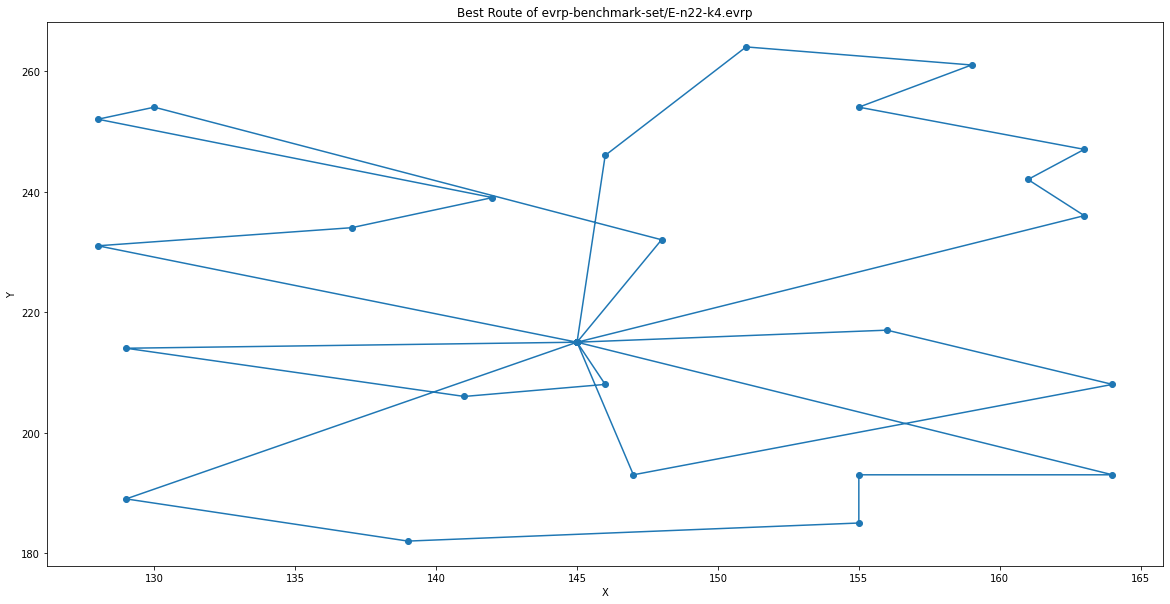

In [23]:
x=[]
y=[]
for cluster in best_chromosome:
    for node in cluster:
        x.append(evrp.NODE[node][0])
        y.append(evrp.NODE[node][1])

plt.figure(figsize=(20,10))
plt.title(f'Best Route of {filename}')
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()